In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv("anomaly_features.csv", header = None)

In [177]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.481547,0.001433,0.203289,1.788233,0.048995,1.181685,1.0,0.0,1.0,2.0,2.0,2.0,347.0,347.0,345.0
1,0.045802,0.004306,0.033439,0.116926,0.003204,0.077266,0.0,0.0,0.0,0.0,0.0,0.0,20.0,17.0,20.0
2,0.026298,0.000897,0.029053,0.030809,0.000844,0.020359,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,9.0
3,0.045802,0.001858,0.041040,0.076163,0.002087,0.050329,0.0,0.0,0.0,0.0,0.0,0.0,20.0,17.0,20.0
4,0.026298,0.004422,0.000976,0.121588,0.003331,0.080347,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,13.0


In [178]:
print("Number of rows in dataset:", len(data))

('Number of rows in dataset:', 4039)


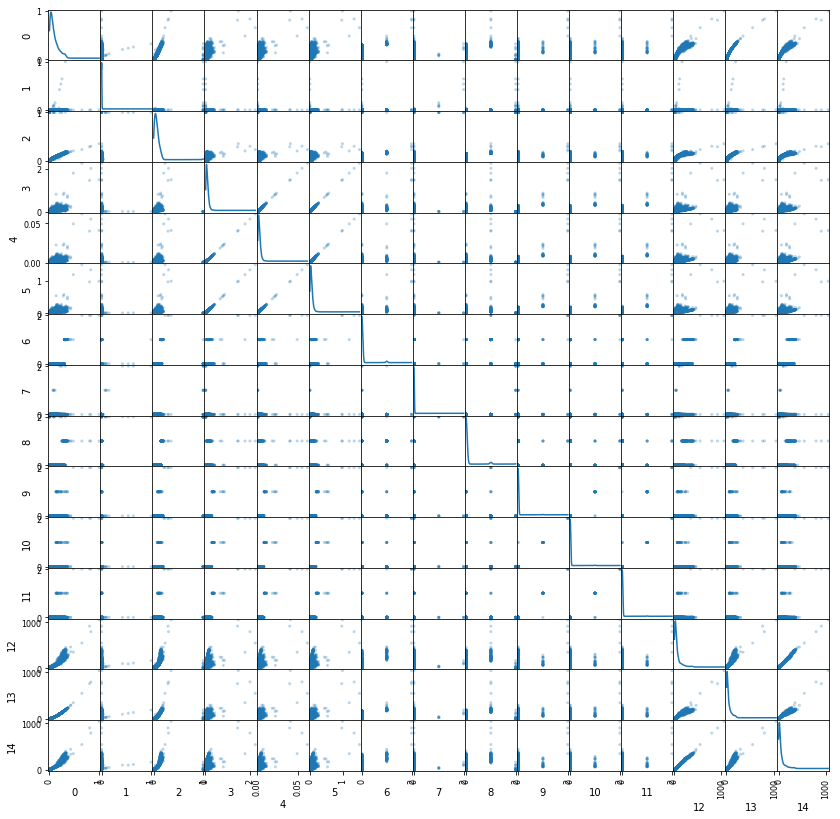

In [152]:
plt.figure(figsize = (20, 20))

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14, 14), diagonal = 'kde');

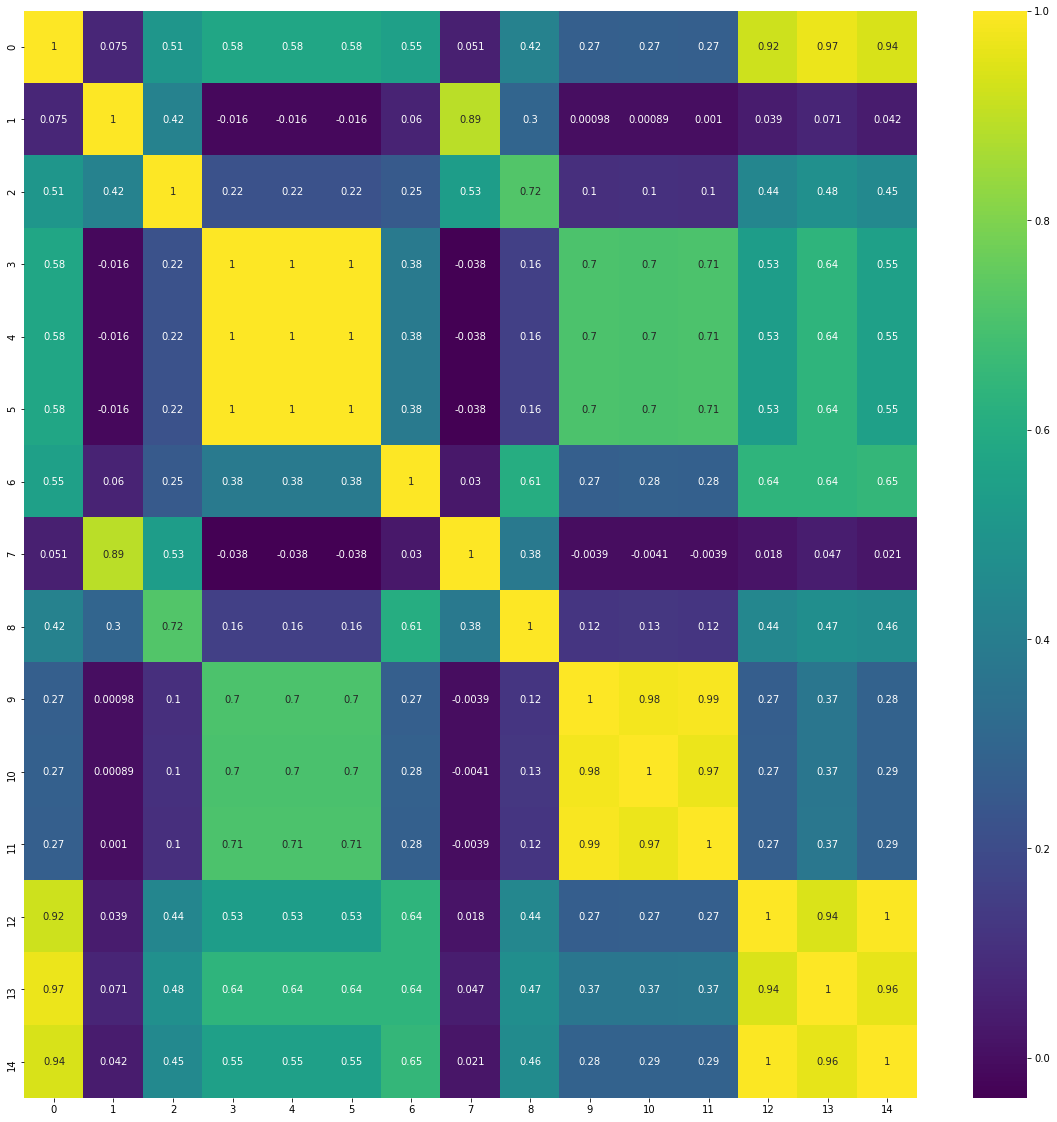

In [153]:
plt.figure(figsize = (20, 20))

sns.heatmap(data.corr(), cmap = plt.cm.viridis, annot = True)

In [179]:
from sklearn.mixture import GaussianMixture

clusterer = GaussianMixture(2)
clusterer.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [180]:
preds_1 = clusterer.predict(data)
print preds_1

[1 0 0 ..., 0 0 0]


In [181]:
centers = clusterer.means_
print centers

[[  7.72138788e-02   2.45724464e-03   5.76327077e-02   7.88650618e-02
    2.16078518e-03   5.21149594e-02   0.00000000e+00   1.32948063e-03
    8.50867603e-03   2.65896126e-04   2.65896126e-04   0.00000000e+00
    4.11368080e+01   3.41387773e+01   3.78319707e+01]
 [  2.88064759e-01   1.26459823e-02   1.59185116e-01   1.80731075e-01
    4.95176198e-03   1.19429216e-01   4.56616289e-01   2.87632308e-02
    5.39310578e-01   1.36625346e-01   1.43816154e-01   1.36625346e-01
    2.59649032e+02   1.70212151e+02   2.41884335e+02]]


In [182]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, preds_1)
print score

0.745570773866


In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(data)
reduced_data_pca = pca.transform(data)

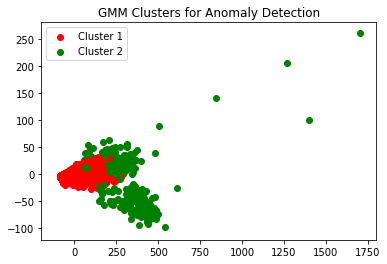

In [183]:
import matplotlib.pyplot as plt

for i in range(0, reduced_data_pca.shape[0]):
    if preds_1[i] == 0:
        c1 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'r')
    elif preds_1[i] == 1:
        c2 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'g')

plt.legend([c1, c2],['Cluster 1', 'Cluster 2'])
plt.title('GMM Clusters for Anomaly Detection')
plt.show()

In [184]:
for i in range(2, 10):
    test_clusterer = GaussianMixture(i)
    test_clusterer.fit(data)
    test_preds = test_clusterer.predict(data)
    score = silhouette_score(data, test_preds)
    print 'Silhoutte score for', i, 'centroids:', score

Silhoutte score for 2 centroids: 0.745570773866
Silhoutte score for 3 centroids: 0.62748492888
Silhoutte score for 4 centroids: 0.44952580902
Silhoutte score for 5 centroids: 0.47555132846
Silhoutte score for 6 centroids: 0.59045661413
Silhoutte score for 7 centroids: 0.579953785411
Silhoutte score for 8 centroids: 0.319871982014
Silhoutte score for 9 centroids: 0.3693624239


In [187]:
clusterer = GaussianMixture(3)
clusterer.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [188]:
preds_2 = clusterer.predict(data)
print preds_2

[1 0 0 ..., 0 0 0]


In [189]:
centers = clusterer.means_
print centers

[[  5.38841825e-02   2.36980859e-03   4.68547732e-02   6.93776145e-02
    1.90084327e-03   4.58455428e-02   0.00000000e+00   1.62749587e-03
    1.04159736e-02   3.25499175e-04   3.25499175e-04   0.00000000e+00
    2.59474907e+01   2.18012257e+01   2.30570226e+01]
 [  3.25538720e-01   2.85409159e-03   1.64035747e-01   2.00506596e-01
    5.49358179e-03   1.32497113e-01   7.57442525e-01   0.00000000e+00
    8.53625702e-01   1.02195614e-01   1.14218511e-01   1.02195614e-01
    2.81110068e+02   2.01001405e+02   2.68135493e+02]
 [  1.88413718e-01   6.25066457e-03   1.12173546e-01   1.25394958e-01
    3.43563495e-03   8.28624613e-02   1.24930299e-03   9.99442390e-03
    9.99442390e-03   2.62351575e-02   2.62351575e-02   2.62351575e-02
    1.25490679e+02   9.40959324e+01   1.17580617e+02]]


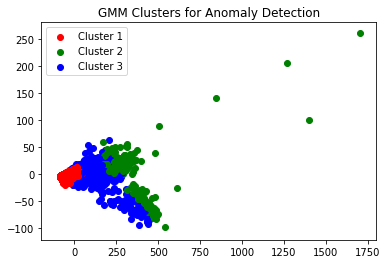

In [190]:
import matplotlib.pyplot as plt

for i in range(0, reduced_data_pca.shape[0]):
    if preds_2[i] == 0:
        c1 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'r')
    elif preds_2[i] == 1:
        c2 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'g')
    else:
        c3 = plt.scatter(reduced_data_pca[i, 0], reduced_data_pca[i, 1], c = 'b')

plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('GMM Clusters for Anomaly Detection')
plt.show()

In [191]:
data.columns = [str(i) for i in range(0, 15)]
selected_features = ['0', '1', '2', '3']

reduced_data = data[selected_features]

In [192]:
clusterer = GaussianMixture(2)
clusterer.fit(reduced_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [193]:
preds_3 = clusterer.predict(reduced_data)
print preds_3

[1 0 0 ..., 0 0 0]


In [194]:
centers = clusterer.means_
print centers

[[ 0.08973292  0.00236891  0.05925311  0.08229195]
 [ 0.23282863  0.05887293  0.44355411  0.33892204]]


In [195]:
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_data, preds_3)
print score

0.820267545961


In [196]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(reduced_data)
reduced_data_2 = pca.transform(reduced_data)

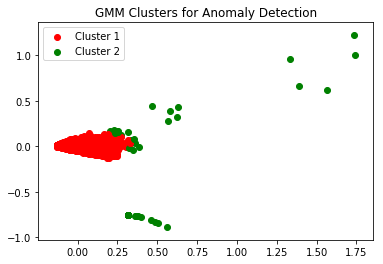

In [197]:
import matplotlib.pyplot as plt

for i in range(0, reduced_data_2.shape[0]):
    if preds_3[i] == 0:
        c1 = plt.scatter(reduced_data_2[i, 0], reduced_data_2[i, 1], c = 'r')
    elif preds_3[i] == 1:
        c2 = plt.scatter(reduced_data_2[i, 0], reduced_data_2[i, 1], c = 'g')

plt.legend([c1, c2],['Cluster 1', 'Cluster 2'])
plt.title('GMM Clusters for Anomaly Detection')
plt.show()

In [198]:
for i in range(2, 10):
    test_clusterer = GaussianMixture(i)
    test_clusterer.fit(reduced_data)
    test_preds = test_clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, test_preds)
    print 'Silhoutte score for', i, 'centroids:', score

Silhoutte score for 2 centroids: 0.820267545961
Silhoutte score for 3 centroids: 0.525468756958
Silhoutte score for 4 centroids: 0.501207471986
Silhoutte score for 5 centroids: 0.40630135765
Silhoutte score for 6 centroids: 0.391259487407
Silhoutte score for 7 centroids: 0.342406595348
Silhoutte score for 8 centroids: 0.339754979245
Silhoutte score for 9 centroids: 0.311922461512


In [200]:
X = data
y = preds_1

In [237]:
from __future__ import division

def getNaivePredictorMetrics(y):
    FP = np.sum(y)
    TP = len(y) - FP
        
    TN = 0
    FN = 0

    accuracy = TP / (TP + FP)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)

    fscore = (precision * recall) / (precision + recall)

    print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
    
    return [accuracy, fscore]

In [202]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from time import time

def trainPredict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}
    
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
    results['train_time'] = end - start
        
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    
    results['pred_time'] = end - start
    
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = f1_score(y_train[:300], predictions_train)
    results['f_test'] = f1_score(y_test, predictions_test)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

In [203]:
import matplotlib.patches as mpatches

def evaluate(results, accuracy, f1, data_label):
    
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    bar_width = 0.16
    colors = ['#A00000', '#00A0A0', '#00A000', '#A0A000', '#0000A0']

    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                ax[j//3, j%3].bar(i + k * bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))

    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    ax[0, 1].axhline(y = accuracy, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, linewidth = 1, color = 'k', linestyle = 'dashed')

    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches)

    plt.suptitle("Performance Metrics for Classification on " + data_label + " Dataset", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [211]:
from IPython.display import display

def displayResultsTable(results):
    results_list = []
    for k, learner in enumerate(results.keys()):
        entry = [learner]
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            entry.append(results[learner][2][metric])
        results_list.append(entry)
    
    result_df = pd.DataFrame(data = results_list)
    result_df.columns = ['Model', 'Train Time', 'Training Accuracy', 'Training F-Score', 'Prediction Time',\
                         'Test Accuracy', 'Test F-Score']
    display(result_df)

In [205]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


def getClassificationResults(X_train, y_train, X_test, y_test):
    clf_A = GaussianNB()
    clf_B = RandomForestClassifier()
    clf_C = AdaBoostClassifier()
    clf_D = SVC()
    clf_E = MLPClassifier()

    samples_100 = len(y_train)
    samples_10 = int(0.1 * samples_100)
    samples_1 = int(0.01 * samples_100)
    
    results = {}
    for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = trainPredict(clf, samples, X_train, y_train, X_test, y_test)
    
    return results

Naive Predictor: [Accuracy score: 0.9314, F-score: 0.4822]
GaussianNB trained on 30 samples.
GaussianNB trained on 302 samples.
GaussianNB trained on 3029 samples.
RandomForestClassifier trained on 30 samples.
RandomForestClassifier trained on 302 samples.
RandomForestClassifier trained on 3029 samples.
AdaBoostClassifier trained on 30 samples.
AdaBoostClassifier trained on 302 samples.
AdaBoostClassifier trained on 3029 samples.
SVC trained on 30 samples.
SVC trained on 302 samples.
SVC trained on 3029 samples.
MLPClassifier trained on 30 samples.
MLPClassifier trained on 302 samples.
MLPClassifier trained on 3029 samples.


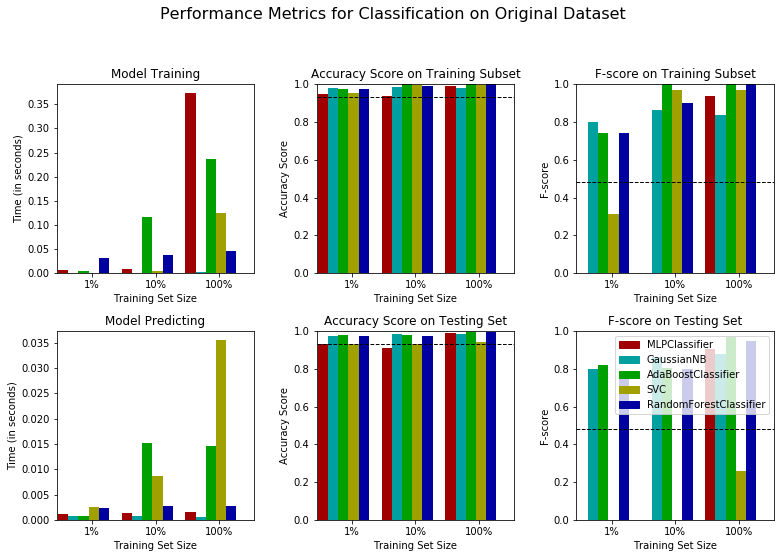

In [238]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

accuracy, fscore = getNaivePredictorMetrics(y)
results = getClassificationResults(X_train, y_train, X_test, y_test)

evaluate(results, accuracy, fscore, "Original")

In [227]:
displayResultsTable(results)

,Model,Train Time,Training Accuracy,Training F-Score,Prediction Time,Test Accuracy,Test F-Score
0,MLPClassifier,0.503167,0.996667,0.967742,0.001030,0.993069,0.945736
1,GaussianNB,0.002368,0.983333,0.838710,0.000682,0.984158,0.876923
2,AdaBoostClassifier,0.244017,1.000000,1.000000,0.014850,0.996040,0.970149
3,SVC,0.120215,0.996667,0.967742,0.032653,0.942574,0.256410
4,RandomForestClassifier,0.048586,1.000000,1.000000,0.003187,0.994059,0.954545


In [250]:
print 'Potential Anomalies:\n'

anomalies = []

for i in range(0, len(y)): 
    if y[i] == 1:
        anomalies.append(i)
        
print anomalies

Potential Anomalies:

[0, 25, 26, 56, 107, 119, 277, 315, 348, 349, 350, 351, 352, 359, 362, 366, 371, 403, 411, 420, 432, 564, 571, 572, 603, 612, 639, 670, 685, 697, 757, 813, 816, 820, 831, 838, 853, 862, 863, 876, 877, 885, 917, 935, 1045, 1063, 1070, 1075, 1096, 1098, 1099, 1107, 1108, 1149, 1192, 1199, 1215, 1221, 1231, 1253, 1268, 1285, 1289, 1312, 1318, 1320, 1324, 1373, 1420, 1424, 1426, 1442, 1443, 1462, 1466, 1490, 1573, 1821, 1827, 1831, 1843, 2053, 2055, 2126, 2130, 2133, 2145, 2154, 2167, 2188, 2224, 2326, 2944, 2945, 2954, 2962, 2964, 2966, 2970, 2976, 2980, 2984, 2989, 2993, 2994, 2995, 2996, 2999, 3002, 3007, 3018, 3024, 3025, 3029, 3030, 3032, 3034, 3035, 3041, 3043, 3044, 3045, 3047, 3048, 3051, 3053, 3054, 3058, 3062, 3063, 3065, 3066, 3068, 3071, 3073, 3076, 3079, 3080, 3084, 3085, 3087, 3090, 3091, 3094, 3095, 3096, 3097, 3101, 3103, 3104, 3106, 3110, 3112, 3120, 3125, 3130, 3133, 3135, 3136, 3141, 3142, 3146, 3150, 3152, 3155, 3157, 3159, 3165, 3169, 3175, 3178, 